In [2]:
import h5py
import numpy as np
import os
from rnn_utils import *

import numpy as np
import math
from math import sin, cos
from mpl_toolkits.mplot3d import proj3d
from scipy.signal import medfilt

Using TensorFlow backend.
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflo

In [3]:
ja = h5py.File('/home/ishan/honors_thesis/nongithub/joint_angles/ja_101012_134451.h5')['joint_angles']
pos = h5py.File('/home/ishan/princeton_data/preds/101012_134451.h5')['positions_pred'][1000:,...]
mf = np.array([medfilt(ja[:,j]) for j in range(30)])

## Figure 2: joints for joint angle calculation

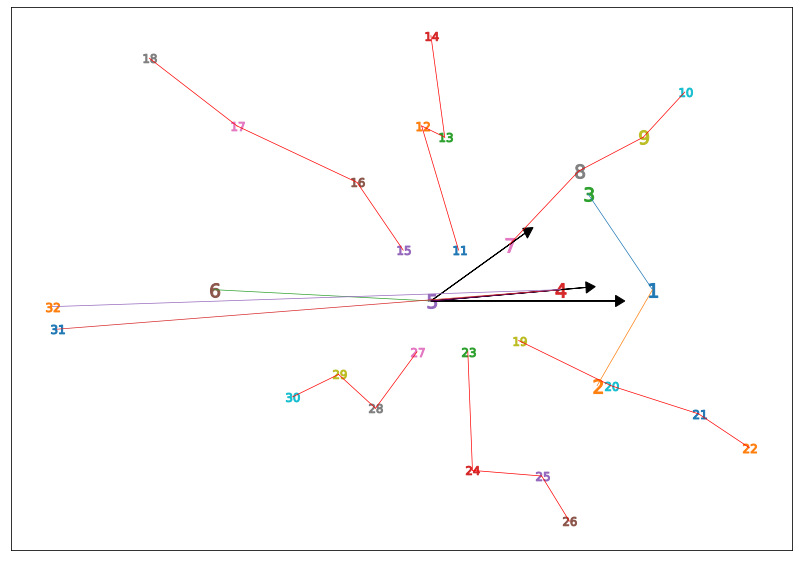

In [3]:
fig, ax = draw_skeleton(, input_type='pos', figsize=(14,10))
x, y = pos[1000,0,4], pos[1000,1,4]
dx, dy = 40, 0
ax.arrow(x, y, dx, dy, head_width=2.0, head_length=2.0, color='black')
dx, dy = (pos[1000,0,3] - x)*1.2, (pos[1000,1,3] - y)*1.2
ax.arrow(x, y, dx, dy, head_width=2.0, head_length=2.0, color='black')
dx, dy = (pos[1000,0,6] - x)*1.2, (pos[1000,1,6] - y)*1.2
ax.arrow(x, y, dx, dy, head_width=2.0, head_length=2.0, color='black')
#ax.annotate("", xy=(x, y), xytext=(x,y+20), 
#            arrowprops=dict(arrowstyle='->'))
fig.savefig('Figure 2 [ja calculation].png')

## Figure 3: median filtering of angle time series

In [5]:
mf = np.empty_like(ja)
for j in range(30):
    mf[:,j] = medfilt(ja[:,j], kernel_size=3)

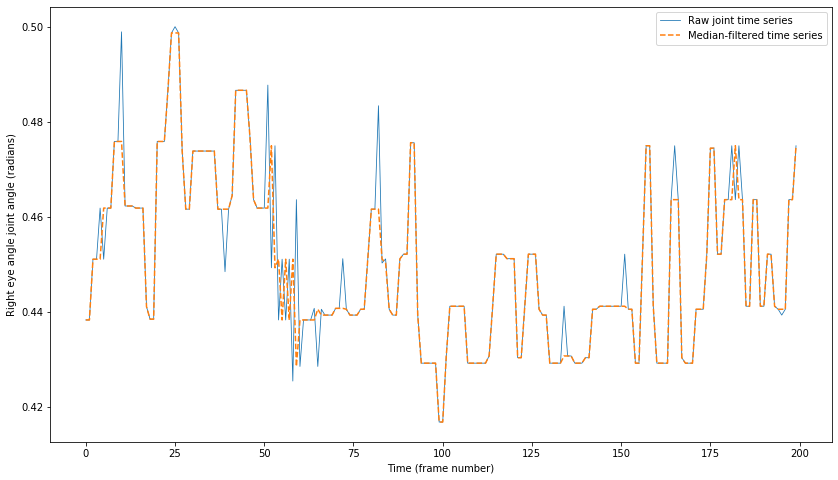

In [7]:
j=2
ntp=200 #(1, 2), 100
plt.figure(figsize=(14,8))
plt.plot(ja[:ntp,j], 
         linewidth=0.8,
         #marker='x', markevery=5,
         label='Raw joint time series');
plt.plot(mf[:ntp,j], '--',
         linewidth=1.5, 
         label='Median-filtered time series');
plt.xlabel('Time (frame number)')
plt.ylabel('Right eye angle joint angle (radians)')
plt.legend()
#plt.figure();
##plt.hist(ja[:,j], bins=20, alpha=0.8);
#plt.hist(mf[:,j], bins=20, alpha=0.8);
plt.savefig('Median-filtered plot.png')